### Original data from https://web.stanford.edu/~hastie/Papers/LARS/diabetes.sdata.txt

- 10 explonatory variables of each patient (age, sex, bmi, bp, s1,s2,s3,s4,s5,s6)
- outcome $y$ is mesure of diabetes progression over 1 year
- we want to predict $y$ given those 10 features
- we add a constant feature $x_1=1$ and make each input data 11 dimensional 

In [2]:
import numpy as np
filename = "diabetes.txt"
data = np.loadtxt(filename)

# Note that the X, Y are transposed. This makes our demo simpler
# when working feature by feature, but something you probably 
# wouldn't do in practice unless you really needed to.
X = data.T[0:10]
Y = data.T[10]
X.shape

(10, 442)

### We first train 10 linear predictor, each one using only one feature

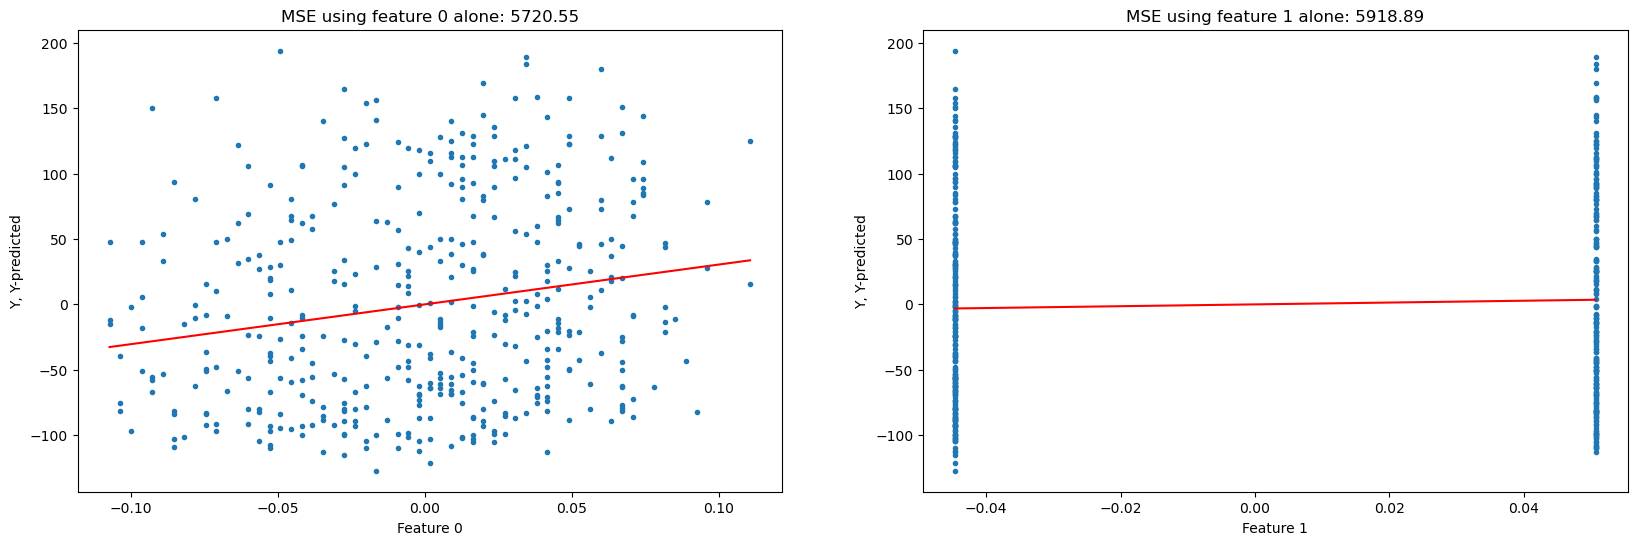

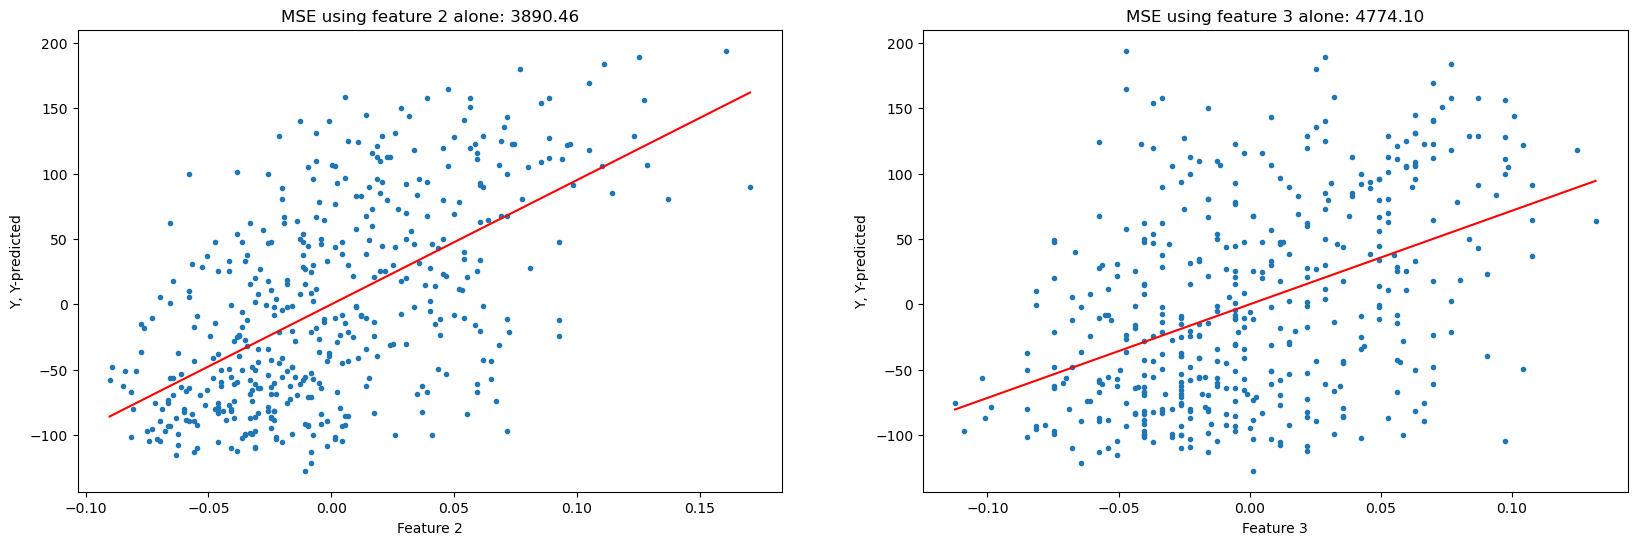

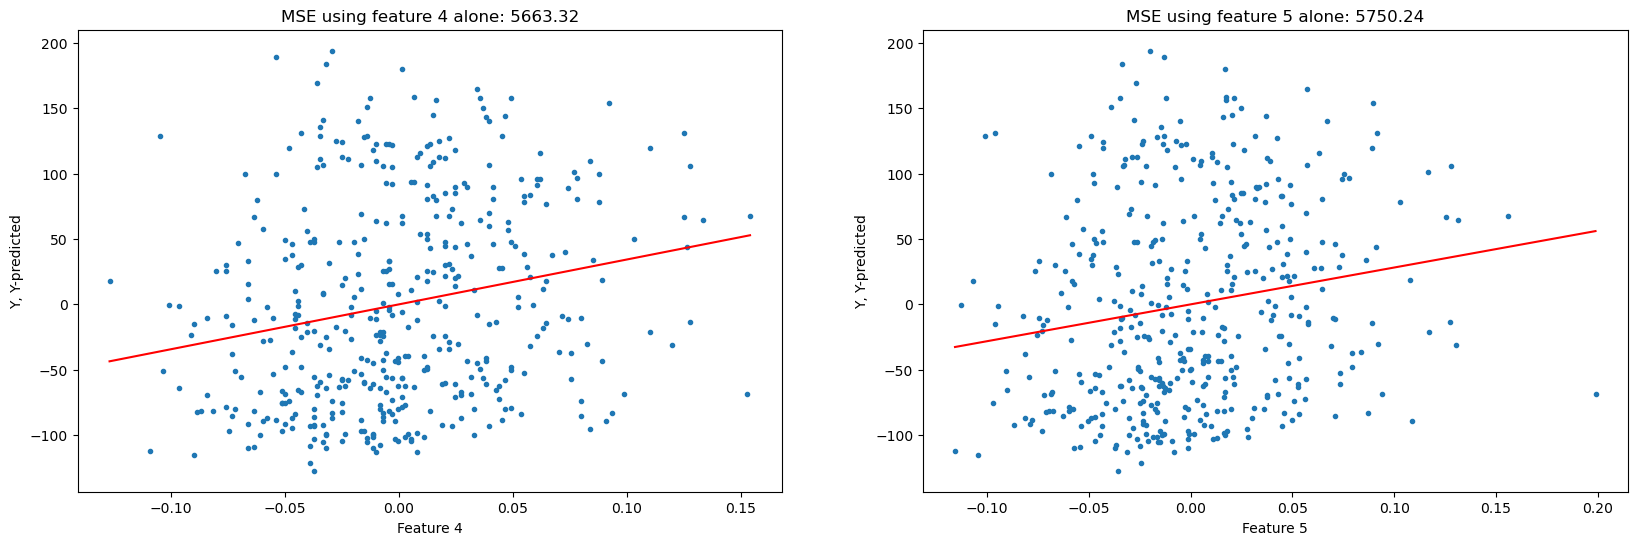

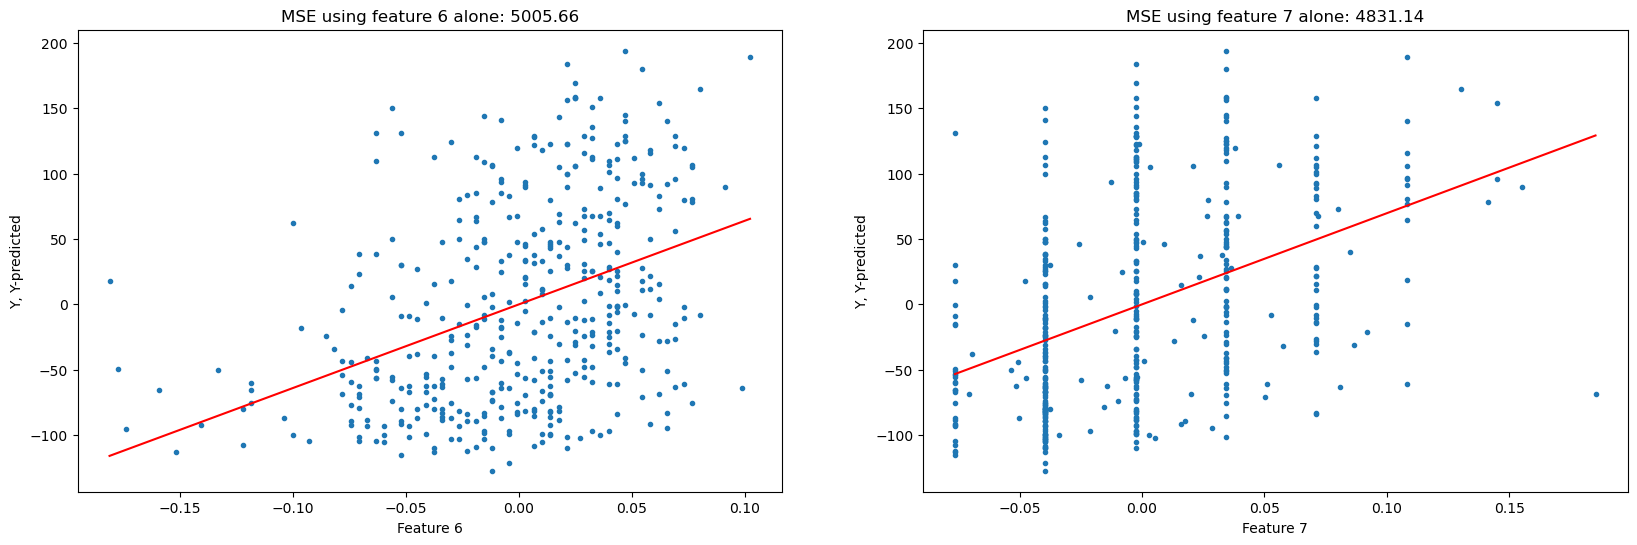

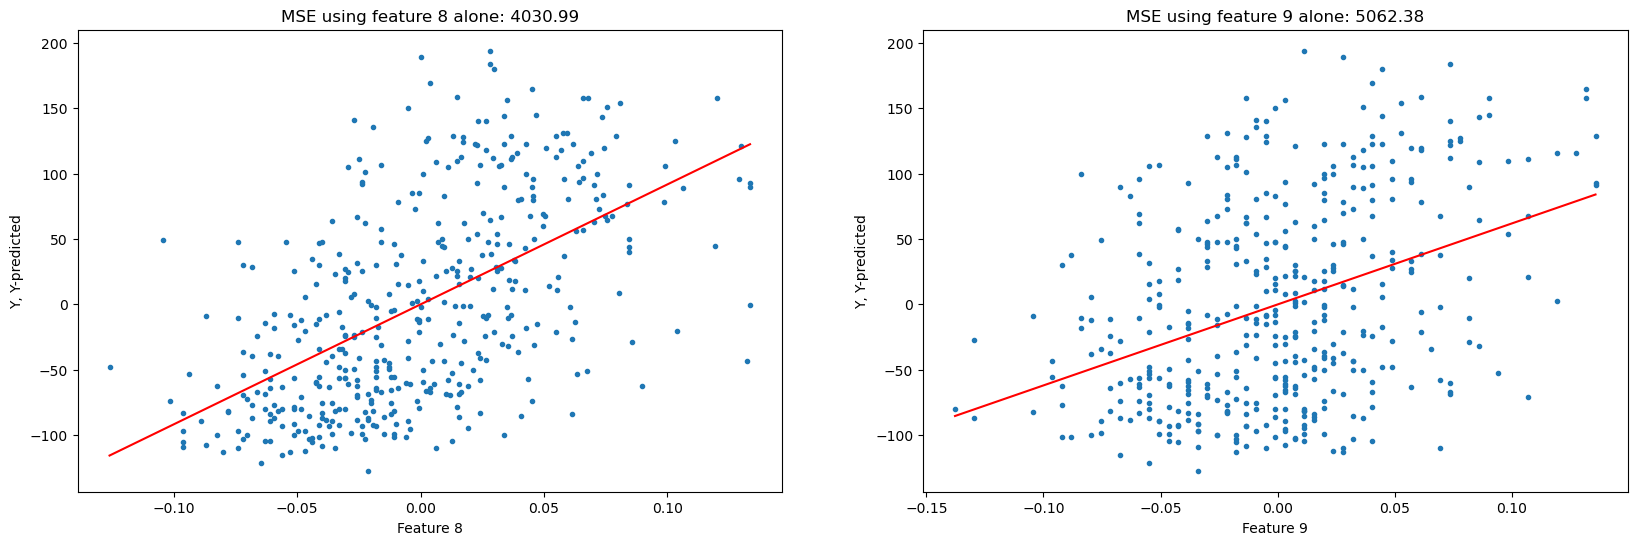

In [3]:
import matplotlib.pyplot as plt


for i in range(10):
    if (i%2==0): plt.figure(figsize=(20,6))
    plt.subplot(1,2,2-(i+1)%2)

    # Make data padded with 1s
    X_ = np.vstack([X[i], np.ones(len(X[i]))]).T

    # Solve for w
    w = np.linalg.lstsq(X_, Y, rcond=None)[0]

    # Plot data
    plt.plot(X[i],Y,'.')

    # Plot learned model
    t = np.linspace(np.min(X[i]),np.max(X[i]),20)
    plt.plot(t, w[0]*t + w[1], 'r')

    # Label graph
    MSE = np.mean((Y - X_ @ w)**2)
    plt.xlabel('Feature '+str(i))
    plt.ylabel('Y, Y-predicted')
    plt.title('MSE using feature %d alone: %.2f' % (i,MSE))
    
    if ((i+1)%2==0): plt.show()

### BMI is the best (single) predictor
- the best single feature prediction achieves MSE=3890

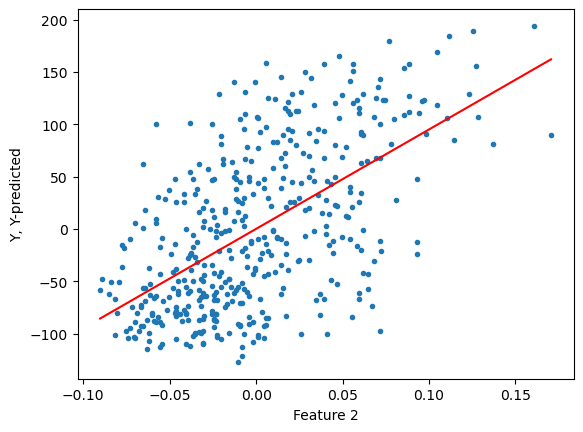

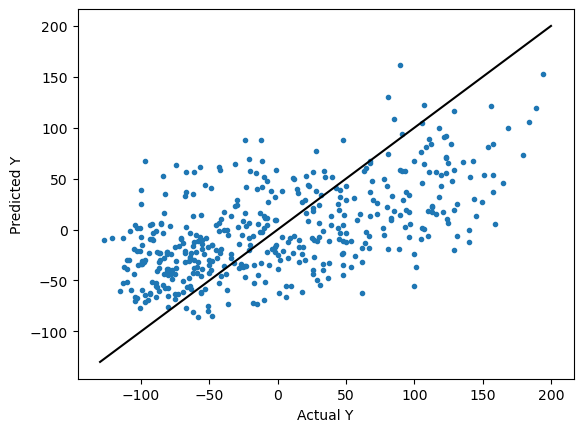

In [4]:
feature_index = 2
X_ = np.vstack([X[feature_index], np.ones(len(X[feature_index]))]).T
w = np.linalg.lstsq(X_, Y, rcond=None)[0]
t = np.linspace(np.min(X[feature_index]),np.max(X[feature_index]),20)

plt.plot(X[feature_index],Y,'.')
plt.plot(t, w[0]*t + w[1], 'r')
plt.xlabel('Feature '+str(feature_index))
plt.ylabel('Y, Y-predicted')
plt.show()

plt.plot(Y,w[0]*X[feature_index] + w[1],'.')
plt.plot([-130, 200],[-130, 200],'k-')
plt.ylabel('Predicted Y')
plt.xlabel('Actual Y')
plt.show()

### the best linear predictor using all 10 features
- we are plotting $y$ on the horizontal axis and $\hat{y}$ on the vertical 
- the closer the points are to a straight line, the better predictor we have
- best linear predictor (all features) is better than best single-feature linear predictor (lower MSE; scatter plot of the points closer to the diagonal)

A.shape (442, 11)
w.shape (11,)


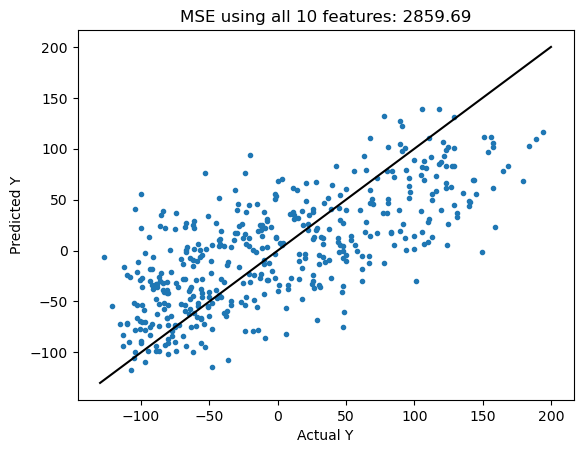

In [5]:
A = np.vstack([X, np.ones(len(X[0]))]).T
w = np.linalg.lstsq(A, Y, rcond=None)[0]
print('A.shape',A.shape)
print('w.shape',w.shape)
Y_= A @ w
MSE = np.mean((Y - Y_)**2)

plt.plot(Y,Y_,'.')
plt.plot([-130, 200],[-130, 200],'k-')
plt.ylabel('Predicted Y')
plt.xlabel('Actual Y')
plt.title('MSE using all 10 features: %.2f' % MSE)
plt.show()